# CSIT456 Lab 1: Intro to Supervised Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10


Let's practise KNN using the Iris dataset. 

Features:
1. Petal length
2. Petal width
3. Sepal length
4. Sepal width

Target variable: Species
1. Versicolor
2. Virginica
3. Setosa


In [2]:
from sklearn import datasets
iris = datasets.load_iris()
type (iris)
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
print (iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
type (iris.data), type (iris.target)

(numpy.ndarray, numpy.ndarray)

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target.shape

(150,)

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Exploratory data analysis

#### Data Formating
Form two numpy ndarrays to represent the predictor variables **X** and target variables **y**. They will be used in trainning KNN model.

In [8]:
X = iris.data
y = iris.target
df = pd.DataFrame (X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Data Visulization

Creat a dataFrame **df** to collect both predictor variables and target variable and use pairplot in searborn to draw a scatter matrix of all the features.

In [9]:
df = pd.DataFrame (X, columns=iris.feature_names)
species = pd.Series(y)
df['species'] = species
df['species']= df['species'].replace ({0:'setosa',1:'versicolor',2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


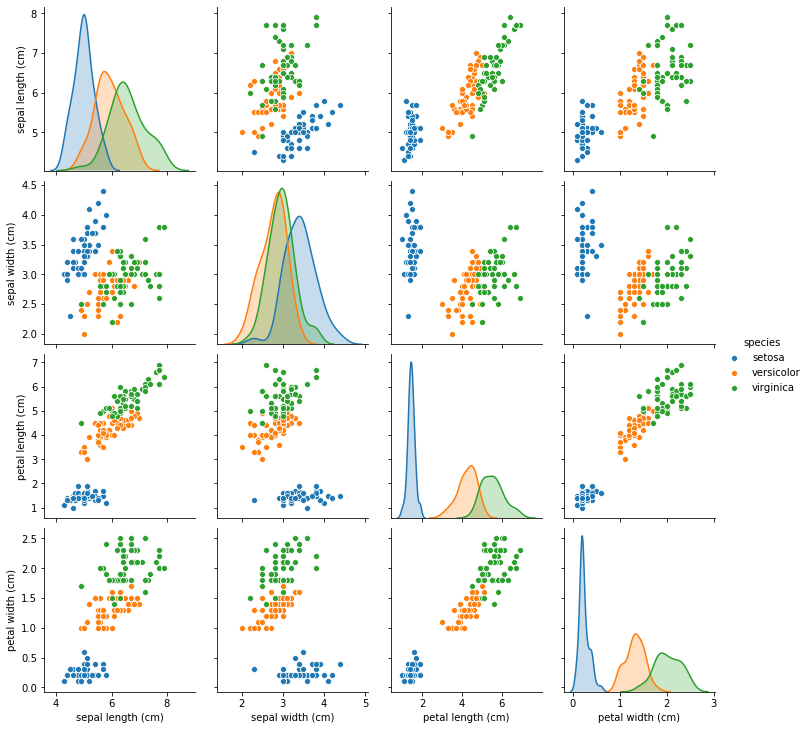

In [10]:
sns.pairplot(df,hue='species')

### Exercise 1: Species Predicting using KNN


#### Exercise 1.1 (5 points)
Spliting the dataset into training set (**X_train** and **y_train**) and test set (**X_test** and **y_test**)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Exercise 1.2 (6 points)
Using KNN for classification and set the value **n_neighbors** to be 3. Train the model by the train set.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### Exercise 1.3 (6 points)
Evaluate the accuracy using the test set and print the test score. 

In [13]:
knn.score(X_test, y_test)

0.9736842105263158

### Exercise 2 Using Cross-validation for parameter tuning

#### Exercise 2.1 ( 6 points)
Create a StratifiedKFold object **skfod** and set the following parameters:
1. set the number of splits to be 5
2. enable shuffling by setting the parameter **shuffle** to be ***True***

In [14]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5, shuffle=True)

#### Exercise 2.2 (15 points)
Use stratified fold to select the best **n_neighbors** from odd numbers from 1 to 15. 

Print the corss-validation score of the best **n_neighbors**. 

In [17]:
from sklearn.model_selection import cross_val_score 
X_train, X_test, y_train, y_test = train_test_split(X, y)

neighbors = np.arange(1,15,2)

cross_val_scores = [] 
for i in neighbors:     
    knn = KNeighborsClassifier(n_neighbors=i)     
    scores = cross_val_score(knn, X_train, y_train, cv=skfold)     
    cross_val_scores.append(np.mean(scores)) 
print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores))) 
best_n_neighbors = neighbors[np.argmax(cross_val_scores)] 
print("best n_neighbors: {}".format(best_n_neighbors))

best cross-validation score: 0.973
best n_neighbors: 3


#### Exercise 2.3 (6 points)
Using the best **n_neighbor** to train the KNN model with the train set, make predictions on test set, and compare predictions with the known labels. Print the prediction accuracy. 

In [5]:
x = ['best_n_neighbors'].format
df = pd.DataFrame (x)
df.head()

AttributeError: 'list' object has no attribute 'format'

#### Exercise 2.4 Predict samples (6 points)
Make prediction on some unseen data. Use your model to predict the species of the following two random observations. 

Note: 0:'setosa',1:'versicolor',2:'virginica'

In [ ]:
x_new = [[3,4,5,2],[5,4,2,2]]
species_dict = {0:'setosa',1:'versicolor',2:'virginica'}

